In [49]:
import pandas as pd
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR,SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier,HistGradientBoostingRegressor,GradientBoostingRegressor 
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

# TRAIN DATASET CLEANING

In [51]:
train_dataset = pd.read_csv('diamonds_train.csv', index_col=0)


In [52]:
train_dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.32,Ideal,D,VS2,61.9,55.0,4.43,4.39,2.73,972
1,0.40,Premium,F,VS2,59.7,58.0,4.79,4.83,2.87,842
2,0.54,Very Good,D,VS2,61.1,59.0,5.25,5.29,3.22,1583
3,0.51,Ideal,G,VS1,61.7,55.0,5.17,5.14,3.18,1781
4,1.01,Very Good,F,SI2,62.8,60.0,6.33,6.40,4.00,4416


In [53]:
train_dataset.shape

(40345, 10)

In [54]:
train_dataset.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [55]:
train_dataset.describe()

# I see that length,width and depth have value 0 in some rows, what doesnt make sense to me and I decide to remove 

,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.797172,61.751107,57.459331,5.729629,5.733453,3.538394,3926.799851
std,0.473108,1.436642,2.240572,1.119718,1.149815,0.708202,3981.049236
min,0.200000,43.000000,44.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,951.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2409.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,5311.000000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18818.000000


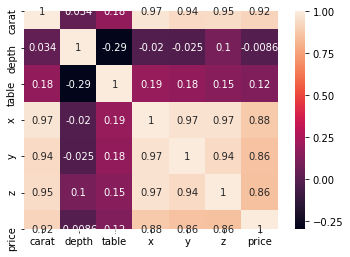

In [56]:
corr = train_dataset.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [57]:
# columns x,y anz z are highly correlated. I decide to remove them

In [58]:
train_dataset.drop(['x','y','z'], axis=1, inplace= True)
#df.head()

In [59]:
# CUT COLUMN
train_dataset.cut.value_counts()

Ideal        16089
Premium      10333
Very Good     9025
Good          3693
Fair          1205
Name: cut, dtype: int64

In [60]:
train_dataset.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [61]:
cut=('Good','Fair','Very Good','Premium','Ideal')

train_dataset["cut"]=pd.Categorical(train_dataset.cut,ordered=True,categories=cut)
train_dataset['cut_c'] = train_dataset.cut.cat.codes



In [62]:
color=('J', 'H', 'I','E','G','F','D')

train_dataset["color"]=pd.Categorical(train_dataset.color,ordered=True,categories=color)
train_dataset['color_c'] = train_dataset.color.cat.codes

In [63]:
clarity=("I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1","IF")

train_dataset["clarity"]=pd.Categorical(train_dataset.clarity,ordered=True,categories=clarity)
train_dataset['clarity_c'] = train_dataset.clarity.cat.codes

In [64]:
train_dataset.drop(['cut','color','clarity'], inplace = True, axis=1)


In [65]:
train_dataset

,carat,depth,table,price,cut_c,color_c,clarity_c
0,0.32,61.9,55.0,972,4,6,3
1,0.40,59.7,58.0,842,3,5,3
2,0.54,61.1,59.0,1583,2,6,3
3,0.51,61.7,55.0,1781,4,4,4
4,1.01,62.8,60.0,4416,2,5,1
...,...,...,...,...,...,...,...
40340,0.74,66.0,56.0,2069,1,3,2
40341,0.27,62.3,54.0,500,4,1,4
40342,0.30,61.6,57.0,709,4,6,2
40343,0.46,58.7,60.0,1452,2,3,4


In [66]:
# NOT NULL VALUES
train_dataset.isnull().sum()

carat        0
depth        0
table        0
price        0
cut_c        0
color_c      0
clarity_c    0
dtype: int64

In [67]:
train_dataset.columns

Index(['carat', 'depth', 'table', 'price', 'cut_c', 'color_c', 'clarity_c'], dtype='object')

In [68]:
X = train_dataset[['carat', 'depth', 'table', 'cut_c', 'color_c', 'clarity_c']]
y=train_dataset['price']


In [69]:
print(X.shape, y.shape)

(40345, 6) (40345,)


In [70]:
train_dataset.to_csv('diamonds_train_cleaned.csv')


In [74]:
X_test

,carat,depth,table,cut_c,color_c,clarity_c
5297,0.34,59.4,62.0,3,5,2
21733,1.26,62.8,54.0,4,0,1
5757,1.01,58.3,58.0,3,5,1
28982,0.55,61.4,57.0,4,5,3
14311,0.38,58.8,61.0,3,6,3
...,...,...,...,...,...,...
1832,0.91,61.9,56.0,4,0,4
32171,1.09,62.5,58.0,3,1,1
29964,1.05,63.0,57.0,2,4,3
4042,0.43,62.7,55.0,3,3,1


In [73]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TEST DATASET CLEANING

In [24]:
test = pd.read_csv('diamonds_test.csv', index_col=0)


In [25]:
cut=('Good','Fair','Very Good','Premium','Ideal')

test["cut"]=pd.Categorical(test.cut,ordered=True,categories=cut)
test['cut_c'] = test.cut.cat.codes

In [26]:
color=('J', 'H', 'I','E','G','F','D')

test["color"]=pd.Categorical(test.color,ordered=True,categories=color)
test['color_c'] = test.color.cat.codes

In [27]:
clarity=("I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1","IF")

test["clarity"]=pd.Categorical(test.clarity,ordered=True,categories=clarity)
test['clarity_c'] = test.clarity.cat.codes

In [44]:
test

,carat,depth,table,cut_c,color_c,clarity_c
0,0.56,60.6,56.0,4,4,4
1,0.32,61.9,58.0,3,1,3
2,0.71,64.2,58.0,0,4,3
3,1.12,62.1,58.0,3,1,4
4,1.21,61.5,56.0,4,4,3
...,...,...,...,...,...,...
13444,0.42,61.2,57.0,4,1,4
13445,0.71,66.4,62.0,1,1,4
13446,0.60,61.1,57.0,4,4,4
13447,0.70,62.8,61.0,3,6,1


In [1]:
test.drop(['cut','color','clarity'], inplace = True, axis=1)


In [2]:
test.drop(['x','y','z'], axis=1, inplace= True)


In [47]:
test.to_csv('test_dataset_cleaned')

# FIRST MODELS OBSERVATION 

In [ ]:
models = {
    "GradientBoostingRegressor" : GradientBoostingRegressor(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "HistGradientBoostingRegressor" :HistGradientBoostingRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(n_estimators=100), 
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)

In [226]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    try:
        y_pred = model.predict(X_test)
        print(f"Evaluating model {name}")
        printMetric("RSME",math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred)))

    except:
        print("Error")

Evaluating model GradientBoostingRegressor
	 RSME: 660.322
Evaluating model KNeighborsRegressor
	 RSME: 1939.993
Evaluating model HistGradientBoostingRegressor
	 RSME: 563.501
Evaluating model RandomForestRegressor
	 RSME: 576.788


## RANDOM FOREST

In [90]:
model=RandomForestRegressor(n_estimators=250)

In [91]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [109]:
y_pred=model.predict(X_test)

In [110]:
y_pred.shape

(8069,)

In [111]:
y_pred

array([ 954.72733333, 2579.876     , 8064.846     , ..., 1004.772     ,
        629.63633333,  648.074     ])

In [112]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

558.56822410256

In [113]:
a=pd.DataFrame({"y_pred":y_pred,"y_test":y_test})

In [116]:
a

,y_pred,y_test
17814,954.727333,853
27914,2579.876000,2756
12886,8064.846000,7657
37574,522.268933,534
3316,4396.315076,3597
...,...,...
31314,1378.052000,1389
26665,6240.064000,6526
4465,1004.772000,1042
36944,629.636333,505


In [118]:
y_pred=model.predict(test)

In [119]:
y_pred=model.predict(X[:8069])

In [120]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

5606.51251988698

# -------------------------------------------------------------------------------------------

In [109]:
params = { 'n_estimators':[1500,1750],
           'min_samples_split':[50, 100],
           'min_samples_leaf': [50, 100]}

tuning_gradient = GridSearchCV(estimator=RandomForestRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=1,max_features='sqrt', random_state=10), 
            param_grid=params,n_jobs=4,iid=False, cv=5)

#tuning_gradient.fit(X_train,y_train)

In [114]:
tuning_gradient.fit(X_train,y_train)

In [ ]:
RandomForestRegressor.get_params(RandomForestRegressor).keys()

In [ ]:
y_pred = tuning_gradient.predict(X_test)


In [ ]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

In [ ]:
y_pred=tuning_gradient.predict(test)

# ----------------------------------------------------------------------------------------

In [115]:
model=RandomForestRegressor(n_estimators=300)

In [116]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [117]:
y_pred = model.predict(X_test)

In [118]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

549.0798115311766

In [102]:
y_pred=model.predict(test)

In [103]:
y_pred

array([ 1900.26066667,   545.33733333,  2475.86      , ...,
        2121.912     ,  2165.39086667, 10903.908     ])

In [104]:
test

,carat,depth,table,cut_c,color_c,clarity_c
0,0.56,60.6,56.0,4,4,4
1,0.32,61.9,58.0,3,1,3
2,0.71,64.2,58.0,0,4,3
3,1.12,62.1,58.0,3,1,4
4,1.21,61.5,56.0,4,4,3
...,...,...,...,...,...,...
13444,0.42,61.2,57.0,4,1,4
13445,0.71,66.4,62.0,1,1,4
13446,0.60,61.1,57.0,4,4,4
13447,0.70,62.8,61.0,3,6,1


In [227]:
#math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

# ----------------------------------------------------------------------------------------

In [ ]:
# 2. Create an instance of the estimator
model = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
# 3. Use the trainning data to train the estimator
model.fit(X_train, y_train)
# 4. Evaluate the model


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

In [ ]:
y_pred = model.predict(test)


In [ ]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

# ----------------------------------------------------------------------------------------

In [ ]:
param_grid = {'n_estimators': [25,50,75,100], 
                  'max_depth': [10,15,20,30]}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
a = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)

# ----------------------------------------------------------------------------------------

In [121]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [176]:
#grid_search.fit(X_train,y_train)

In [43]:
y_pred = grid_search.predict(X_test)


In [143]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

555.7772540227023

In [140]:
y_pred = grid_search.predict(X[:8069])


In [141]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

5530.1412488640535

In [ ]:
y_pred = grid_search.predict(X[:8069])


In [ ]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

# -------------------------------------------------------------------------------------------

In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)


In [ ]:
RF.fit(X_train,y_train)

In [ ]:
y_pred = RF.predict(X_test)


In [ ]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

In [ ]:
y_pred = RF.predict(X[:8069])


In [ ]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

# -------------------------------------------------------------------------------------------

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse: %f" %(rmse))

In [ ]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

In [ ]:
y_pred = regressor.predict(X[:8069])


In [ ]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

# HistGradientBoostingRegressor

In [84]:


model=GradientBoostingRegressor(n_estimators=250,max_depth=30, min_samples_split=2)

In [85]:
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=30,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
y_pred = model.predict(X_test)

In [87]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

723.8466769105437

In [88]:
y_pred = model.predict(X[:8069])

In [89]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

5661.5310959721455

# ----------------------------------------------------------------------------------------

In [150]:
RF = RandomForestRegressor(random_state=55, n_jobs=-1)


In [151]:
parameter_grid = {'n_estimators': [25,50,75,100], 
                  'max_depth': [10,15,20,30],}

In [169]:
#RF_classifier = GridSearchCV(estimator=RF, param_grid=parameter_grid, refit=True, cv=5, n_jobs=-1,verbose=2)

#RF_classifier.fit(X_train, y_train)

In [ ]:
results = pd.DataFrame(RF_classifier.cv_results_)
results.head()

In [ ]:
RF_classifier.best_params_


In [ ]:
RF_classifier.best_estimator_


In [170]:
model=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=-1, oob_score=False,
                      random_state=55, verbose=0, warm_start=False)

In [171]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=-1, oob_score=False,
                      random_state=55, verbose=0, warm_start=False)

In [172]:
y_pred = model.predict(X_test)

In [173]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

557.9770022083663

In [174]:
y_pred = model.predict(X[:8069])

In [175]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

5606.958361598339

# -------------------------------------------------------------------------------------------

In [130]:
params = { 'min_samples_leaf': [50, 100,150,200]}
tuning_gradient = GridSearchCV(estimator=HistGradientBoostingRegressor(max_depth=4, min_samples_leaf=1, random_state=10), 
            param_grid=params,n_jobs=4,iid=False, cv=5,verbose=2)

In [131]:

tuning_gradient.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.5s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=HistGradientBoostingRegressor(l2_regularization=0.0,
                                                     learning_rate=0.1,
                                                     loss='least_squares',
                                                     max_bins=255, max_depth=4,
                                                     max_iter=100,
                                                     max_leaf_nodes=31,
                                                     min_samples_leaf=1,
                                                     n_iter_no_change=None,
                                                     random_state=10,
                                                     scoring=None, tol=1e-07,
                                                     validation_fraction=0.1,
                                                     verbose=0,
                                                     warm_start=False),
           

In [132]:
y_pred = tuning_gradient.predict(X_test)

In [133]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

603.1060399453974

In [134]:
y_pred = tuning_gradient.predict(X[:8069])

In [135]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

5587.905015207746

# -------------------------------------------------------------------------------------------

In [ ]:

# Find the best parameters for the model
parameters = {
    'max_depth': [70, 80, 90, 100],
    'n_estimators': [900, 1000, 1100]
}
gridforest = GridSearchCV(regr, parameters, cv = 3, n_jobs = -1, verbose = 1)
gridforest.fit(X_train, y_train)
gridforest.best_params_

In [ ]:
y_pred = gridforest.predict(X_test)

In [138]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

5587.905015207746

In [ ]:
y_pred = gridforest.predict(X[:8069])

In [ ]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

# -------------------------------------------------------------------------------------------

In [236]:
param_grid = param_grid={'n_estimators':[100], 'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'max_depth':[6,4,6], 'min_samples_leaf':[3,5,9,17], 'max_features':[1.0,0.3,0.1] } 




# Create a based model
gbr = GradientBoostingRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, 
                          cv = 3, n_jobs = 4, verbose = 2)

In [237]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   18.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 432 out of 432 | elapsed:  3.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [244]:
y_pred = grid_search.predict(X_test)

In [245]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

546.2876728487678

In [242]:
y_pred = grid_search.predict(X[:8069])

In [243]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

5517.451384404071

In [246]:
y_pred = grid_search.predict(test)

# AdaBoostRegressor

In [42]:
model=AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=50)

In [43]:
model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=50)

In [44]:
y_pred = model.predict(X_test)

In [45]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

267.4614940666459

# ----------------------------------------------------------------------------------------

In [ ]:
params = {'learning_rate':[0.15,0.1,0.05], 
           'n_estimators':[1500,1750]}


tuning_gradient =GridSearchCV(estimator=AdaBoostRegressor( random_state=10), 
            param_grid=params,n_jobs=4,iid=False, cv=5)

In [ ]:
#tuning_gradient.fit(X_train,y_train)

In [ ]:
AdaBoostRegressor.get_params(AdaBoostRegressor).keys()

In [ ]:
y_pred = tuning_gradient.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

In [ ]:
y_pred = model.predict(test)

# DECISION TREE REGRESSION

In [46]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse: %f" %(rmse))

rmse: 1.661905


In [47]:
y_pred = regressor.predict(X[:8069])

In [48]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))


In [49]:
rmse

5603.380549972059

# -------------------------------------------------------------------------------------------

In [ ]:
param_grid = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

clf = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   cv=5 , n_jobs=1, verbose=1)
%time _ = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


In [ ]:
y_pred = clf.predict(X[:8069])

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


# H2O

In [ ]:
# OTRO JN

# PRUEBAS

# TO CSV

In [247]:
result=pd.DataFrame({"id":range(len(y_pred)),"price":y_pred})

In [248]:
result

,id,price
0,0,1870.562448
1,1,629.805451
2,2,2448.556476
3,3,5831.746722
4,4,8475.221946
...,...,...
13444,13444,965.858657
13445,13445,2169.901275
13446,13446,2014.909972
13447,13447,2245.350055


In [ ]:
result.to_csv("my_submition11",index=False)

In [ ]:
result.shape